In [1]:
import h5py as h5
import arepo
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
from scipy.interpolate import interp1d
from scipy.stats import binned_statistic_2d
from numba import njit
import importlib
import os
import itertools

In [2]:
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble=r"""
\usepackage{amsmath}
""")
# mpl.rcParams.update({'font.size': 22})
# mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
# color palette
tb_c = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f',
        '#edc948', '#b07aa1', '#ff9da7', '#9c755f', '#bab0ac']

columnwidth = 242.26653 / 72.27 # converts pts to inches
textwidth = 513.11743 / 72.27

mpl.rcParams.update({'font.size': 8})

In [3]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

Rs_list = ['116', '129', '142']
Vv_list = ['116', '129', '142']
ecc_list = ['04', '05', '06']

In [4]:
# def get_orbit(Rs, Vv, ecc):
#     output_dir = basepath + 'runs/MW7_GSE4-eRVgrid-lvl4/lvl4-Rs'+Rs+'-Vv'+Vv+'-e'+ecc+'/output'
#     orbit = {}
#     orbit['Time'] = []
#     orbit['Orbit'] = []
#     for idx in np.arange(320+1):
#         fname = output_dir + '/fof_subhalo_tab_'+str(idx).zfill(3)+'.hdf5'
        
#         if not os.path.exists(fname):
#             print('got to idx='+str(idx-1)+' for Rs,Vv,ecc='+Rs+','+Vv+','+ecc)
#             break
        
#         t = h5.File(fname, mode='r')
#         orbit['Time'].append(t['Header'].attrs['Time'])
#         SubhaloPos = t['Subhalo/SubhaloPos'][:]
#         if len(SubhaloPos) > 1:
#             orbit['Orbit'].append(SubhaloPos[1] - SubhaloPos[0])
#         else:
#             orbit['Orbit'].append(np.array([0., 0., 0.]))
#         t.close()
    
#     for k in orbit.keys():
#         orbit[k] = np.array(orbit[k])
    
#     orbit['Rsep'] = np.linalg.norm(orbit['Orbit'], axis=1)
        
#     return orbit

In [18]:
def get_orbit(Rs, Vv, ecc):
    output_dir = basepath + 'plots/bim_metric/centering/'
    fname = output_dir + 'sim_'+str(Rs)+'_'+str(Vv)+'_'+str(ecc)+'.npy'
    f = np.load(fname, allow_pickle=True).item()
    
    orbit = {}
    orbit['Time'] = np.copy(f['time'])
    orbit['Orbit'] = f['com1'] - f['com0']
    orbit['Rsep'] = np.linalg.norm(orbit['Orbit'], axis=1)
    
    return orbit

In [6]:
# orbits = {}
# for Rs, Vv, ecc in tqdm(itertools.product(Rs_list, Vv_list, ecc_list)):
#     if Rs not in orbits.keys():
#         orbits[Rs] = {}
#     if Vv not in orbits[Rs].keys():
#         orbits[Rs][Vv] = {}
#     orbits[Rs][Vv][ecc] = get_orbit(Rs, Vv, ecc)            

In [7]:
# fig, axs = plt.subplots(2, 3, figsize=(textwidth, 0.4*textwidth), height_ratios=[1, 1.5])

# ############ vary Rs
# orbit = orbits['129']['129']['05']
# axs[0][0].plot(orbit['Orbit'][:,0], orbit['Orbit'][:,1], c='k', zorder=10)
# axs[1][0].plot(orbit['Time'], orbit['Rsep'], c='k', zorder=10)

# orbit = orbits['116']['129']['05']
# axs[0][0].plot(orbit['Orbit'][:,0], orbit['Orbit'][:,1], c=tb_c[0])
# axs[1][0].plot(orbit['Time'], orbit['Rsep'], c=tb_c[0])

# orbit = orbits['142']['129']['05']
# axs[0][0].plot(orbit['Orbit'][:,0], orbit['Orbit'][:,1], c=tb_c[2])
# axs[1][0].plot(orbit['Time'], orbit['Rsep'], c=tb_c[2])

# ############ vary Vv
# orbit = orbits['129']['129']['05']
# axs[0][1].plot(orbit['Orbit'][:,0], orbit['Orbit'][:,1], c='k', zorder=10)
# axs[1][1].plot(orbit['Time'], orbit['Rsep'], c='k', zorder=10)

# orbit = orbits['129']['116']['05']
# axs[0][1].plot(orbit['Orbit'][:,0], orbit['Orbit'][:,1], c=tb_c[0])
# axs[1][1].plot(orbit['Time'], orbit['Rsep'], c=tb_c[0])

# orbit = orbits['129']['142']['05']
# axs[0][1].plot(orbit['Orbit'][:,0], orbit['Orbit'][:,1], c=tb_c[2])
# axs[1][1].plot(orbit['Time'], orbit['Rsep'], c=tb_c[2])

# ############ vary ecc
# orbit = orbits['129']['129']['05']
# axs[0][2].plot(orbit['Orbit'][:,0], orbit['Orbit'][:,1], c='k', zorder=10)
# axs[1][2].plot(orbit['Time'], orbit['Rsep'], c='k', zorder=10)

# orbit = orbits['129']['129']['04']
# axs[0][2].plot(orbit['Orbit'][:,0], orbit['Orbit'][:,1], c=tb_c[0])
# axs[1][2].plot(orbit['Time'], orbit['Rsep'], c=tb_c[0])

# orbit = orbits['129']['129']['06']
# axs[0][2].plot(orbit['Orbit'][:,0], orbit['Orbit'][:,1], c=tb_c[2])
# axs[1][2].plot(orbit['Time'], orbit['Rsep'], c=tb_c[2])

# for ax in axs[0].ravel():
#     ax.set(xlim=(-150, 100), ylim=(-50, 50))
#     ax.set(aspect='equal')
#     ax.set(xlabel=r'$x\,[\,\textrm{kpc}\,]$', ylabel=r'$y\,[\,\textrm{kpc}\,]$')
#     ax.set(xticks=np.arange(-150, 100+1, 50))

# axs[0][0].set_title(r'$\textrm{vary } R_0$')
# axs[0][1].set_title(r'$\textrm{vary } V_0$')
# axs[0][2].set_title(r'$\textrm{vary } \eta$')

# # for ax in axs[1]:
#     # Direct use of textcolor with HTML color definition in LaTeX
#     # text_str = r'\textcolor[HTML]{'+tb_c[2].lstrip('#')+'}{+}' + r'/\textcolor[HTML]{'+tb_c[0].lstrip('#')+'}{-}'
#     # ax.text(0.95, 0.95, text_str, transform=ax.transAxes, ha='right', va='top', fontsize=12)

# for ax in axs[1]:
#     # plus_color = hex_to_rgb_latex(tb_c[2])  # Convert color for '+'
#     # minus_color = hex_to_rgb_latex(tb_c[0])  # Convert color for '-'
#     # print(plus_color)
#     # text_str = r'\textcolor[rgb]' + plus_color + '{+}' + r'\textcolor{black}{/}' + r'\textcolor[rgb]' + minus_color + '{-}'
#     # text_str = r'\pluscolor{+}/\minuscolor{-}'
#     # ax.text(0.95, 0.95, text_str, transform=ax.transAxes, ha='right', va='top', fontsize=12)

#     ax.set(xlim=(0, 4), xticks=np.arange(0, 4+1, 1), xlabel=r'$t\,[\,\textrm{Gyr}\,]$')
#     ax.set(ylim=(0, 150), ylabel=r'$\textrm{separation}\,[\,\textrm{kpc}\,]$')

# fig.tight_layout()

# fig.savefig('orbit_param.pdf')

In [19]:
# orbit0 = get_orbit('142', '116', '04')
# orbit1 = get_orbit('129', '116', '04')

orbit0 = get_orbit('129', '142', '04')
orbit1 = get_orbit('129', '129', '04')

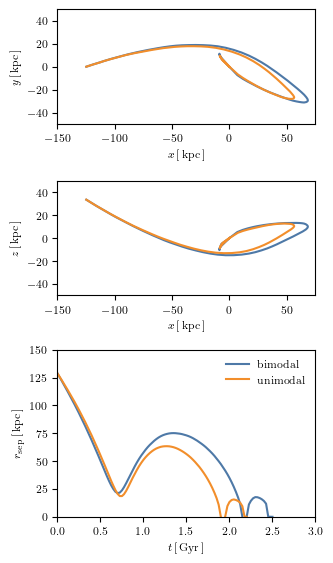

In [20]:
fig, axs = plt.subplots(3, 1, figsize=(columnwidth, 1.7*columnwidth),
                              height_ratios=[2, 2, 2.8])

axs[0].plot(orbit0['Orbit'][:,0], orbit0['Orbit'][:,1], c=tb_c[0])
axs[0].plot(orbit1['Orbit'][:,0], orbit1['Orbit'][:,1], c=tb_c[1])
axs[0].set(xlim=(-150, 75), ylim=(-50, 50))
axs[0].set(xlabel=r'$x\,[\,\textrm{kpc}\,]$')
axs[0].set(ylabel=r'$y\,[\,\textrm{kpc}\,]$')
axs[0].set_aspect('equal')

axs[1].plot(orbit0['Orbit'][:,0], orbit0['Orbit'][:,2], c=tb_c[0])
axs[1].plot(orbit1['Orbit'][:,0], orbit1['Orbit'][:,2], c=tb_c[1])
axs[1].set(xlim=(-150, 75), ylim=(-50, 50))
axs[1].set(xlabel=r'$x\,[\,\textrm{kpc}\,]$')
axs[1].set(ylabel=r'$z\,[\,\textrm{kpc}\,]$')
axs[1].set_aspect('equal')

axs[2].plot(orbit0['Time'], orbit0['Rsep'], c=tb_c[0], label=r'$\textrm{bimodal}$')
axs[2].plot(orbit1['Time'], orbit1['Rsep'], c=tb_c[1], label=r'$\textrm{unimodal}$')
axs[2].set(xlim=(0, 3), ylim=(0, 150))
axs[2].set(xlabel=r'$t\,[\,\textrm{Gyr}\,]$')
axs[2].set(ylabel=r'$r_{\textrm{sep}}\,[\,\textrm{kpc}\,]$')
axs[2].set_aspect('auto')
axs[2].legend(frameon=False)

fig.tight_layout()
fig.savefig('orbit.pdf')
plt.show()

# get all orbits

In [13]:
from scipy.signal import argrelextrema

In [7]:
def get_orbit(Rs, Vv, ecc):
    output_dir = basepath + 'runs/MW7_GSE4-eRVgrid-lvl4/lvl4-Rs'+Rs+'-Vv'+Vv+'-e'+ecc+'/output'
    orbit = {}
    orbit['Time'] = []
    orbit['Orbit'] = []
    for idx in tqdm(np.arange(320+1)):
        fname = output_dir + '/fof_subhalo_tab_'+str(idx).zfill(3)+'.hdf5'
        
        if not os.path.exists(fname):
            print('got to idx='+str(idx-1)+' for Rs,Vv,ecc='+Rs+','+Vv+','+ecc)
            break
        
        t = h5.File(fname, mode='r')
        orbit['Time'].append(t['Header'].attrs['Time'])
        SubhaloPos = t['Subhalo/SubhaloPos'][:]
        if len(SubhaloPos) > 1:
            orbit['Orbit'].append(SubhaloPos[1] - SubhaloPos[0])
        else:
            orbit['Orbit'].append(np.array([0., 0., 0.]))
        t.close()
    
    for k in orbit.keys():
        orbit[k] = np.array(orbit[k])
    
    orbit['Rsep'] = np.linalg.norm(orbit['Orbit'], axis=1)
        
    return orbit

In [20]:
allorbit = {}
for Rs in ['116', '129', '142']:
    allorbit[Rs] = {}
    for Vv in ['116', '129', '142']:
        allorbit[Rs][Vv] = {}
        for ecc in ['04', '05', '06']:
            allorbit[Rs][Vv][ecc] = get_orbit(Rs, Vv, ecc)

100%|██████████| 321/321 [00:10<00:00, 29.96it/s]


In [21]:
def get_tperi(orbit):
    tperi = orbit['Time'][argrelextrema(orbit['Rsep'], np.less)[0][1]]
    return tperi

In [24]:
alltperi = {}
for Rs in ['116', '129', '142']:
    alltperi[Rs] = {}
    for Vv in ['116', '129', '142']:
        alltperi[Rs][Vv] = {}
        for ecc in ['04', '05', '06']:
            alltperi[Rs][Vv][ecc] = get_tperi(allorbit[Rs][Vv][ecc])
            print(Rs, Vv, ecc, alltperi[Rs][Vv][ecc])

116 116 04 1.125
116 116 05 1.67578125
116 116 06 1.3515625
116 129 04 1.05078125
116 129 05 1.275390625
116 129 06 1.25
116 142 04 1.1015625
116 142 05 1.17578125
116 142 06 1.375
129 116 04 1.17578125
129 116 05 1.42578125
129 116 06 1.5
129 129 04 1.92578125
129 129 05 1.451171875
129 129 06 1.5
129 142 04 1.375
129 142 05 1.30078125
129 142 06 1.6015625
142 116 04 1.275390625
142 116 05 1.42578125
142 116 06 1.67578125
142 129 04 1.525390625
142 129 05 2.4765625
142 129 06 1.7265625
142 142 04 1.451171875
142 142 05 1.701171875
142 142 06 2.076171875
